<a href="https://colab.research.google.com/github/ParsProgrammer/Anomaly-Detection/blob/main/anomaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Anomalous User Detection in Cell Phone Calls Dataset**

Dataset Description: A set of cell phone call records from Isla Del Sueño over a ten-day period in June 2006 was narrowed down to about 400 unique cell phones during this period. The records provide critical information about the Catalano social network structure.[dataset link ](https://http://visualdata.wustl.edu/varepository/VAST%20Challenge%202008/challenges/MC3%20-%20Cell%20Phone%20Calls/)

 # **Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
import datetime as dt
from sklearn import preprocessing
from sklearn.manifold import TSNE

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/ParsProgrammer/ParsProgrammer/master/CellPhoneCallRecords.csv')
data['Datetime'] = pd.to_datetime(data['Datetime'])
# you can have your own dataset

# **Feature Engineering**

 Building additional features

## User Activity (From)

**Duration**

Text(0, 0.5, 'Duration')

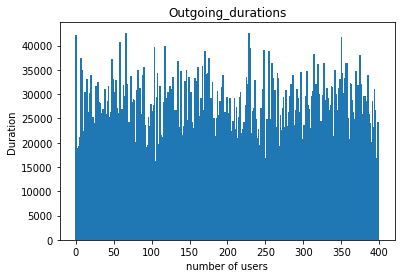

In [ ]:
Outgoing_durations = data.groupby('From').agg({'Duration(seconds)': ['sum']}).reset_index()
Outgoing_durations.columns = Outgoing_durations.columns.droplevel()
Outgoing_durations.columns = ['From', 'Outgoing_durations']


plt.bar(Outgoing_durations['From'],Outgoing_durations['Outgoing_durations'], width=2.1)
plt.title("Outgoing_durations")
plt.xlabel('number of users')
plt.ylabel('Duration')

Skewness: -0.095129
Kurtosis: -0.264095


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count      400.000000
mean     26189.195000
std       6434.884266
min       9681.000000
25%      21904.500000
50%      26307.500000
75%      30568.500000
max      42637.000000
Name: Outgoing_durations, dtype: float64

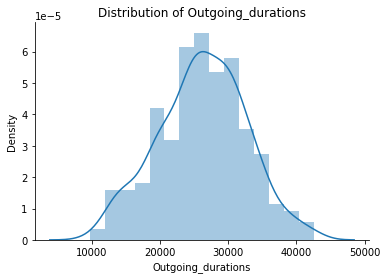

In [ ]:
sns.distplot(Outgoing_durations['Outgoing_durations'])
plt.title("Distribution of Outgoing_durations")
sns.despine()
print("Skewness: %f" % Outgoing_durations["Outgoing_durations"].skew())
print("Kurtosis: %f" % Outgoing_durations["Outgoing_durations"].kurt())
Outgoing_durations["Outgoing_durations"].describe()




**`Delta Time(mean & max)`**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


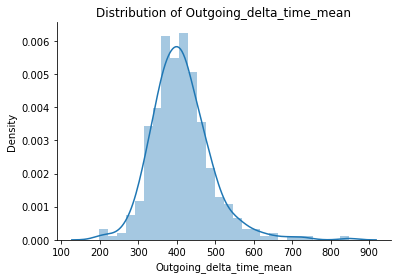

In [ ]:
data.sort_values(['From', 'Datetime'], inplace=True)
data['shift_time'] = data.groupby(['From'])['Datetime'].shift(1)
data['time_diff'] = (data['Datetime'] - data['shift_time']).dt.seconds // 60

Outgoing_delta_time = data.groupby('From').agg({'time_diff': ['mean', 'max']}).reset_index()
Outgoing_delta_time.columns = Outgoing_delta_time.columns.droplevel()
Outgoing_delta_time.columns = ['From', 'Outgoing_delta_time_mean', 'Outgoing_delta_time_max']
Outgoing_delta_time

sns.distplot(Outgoing_delta_time['Outgoing_delta_time_mean'])
plt.title("Distribution of Outgoing_delta_time_mean")
sns.despine()

Skewness: 1.072426
Kurtosis: 3.688085


count    400.000000
mean     411.688381
std       77.904743
min      197.500000
25%      364.355556
50%      405.867374
75%      451.361111
max      847.800000
Name: Outgoing_delta_time_mean, dtype: float64

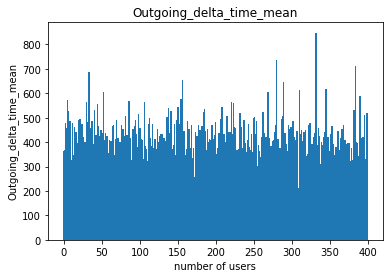

In [ ]:
plt.bar(Outgoing_delta_time['From'],Outgoing_delta_time['Outgoing_delta_time_mean'] ,width=1.9)
plt.title("Outgoing_delta_time_mean")
plt.xlabel('number of users')
plt.ylabel('Outgoing_delta_time_mean')
print("Skewness: %f" % Outgoing_delta_time["Outgoing_delta_time_mean"].skew())
print("Kurtosis: %f" % Outgoing_delta_time["Outgoing_delta_time_mean"].kurt())
Outgoing_delta_time["Outgoing_delta_time_mean"].describe()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


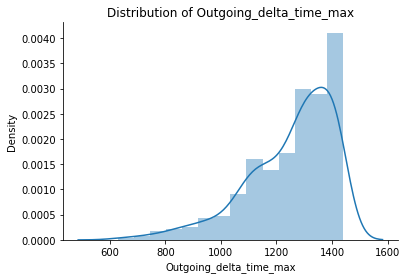

In [ ]:
sns.distplot(Outgoing_delta_time['Outgoing_delta_time_max'])
plt.title("Distribution of Outgoing_delta_time_max")
sns.despine()

Skewness: -1.156309
Kurtosis: 1.162910


count     400.00000
mean     1250.32000
std       157.65502
min       629.00000
25%      1153.25000
50%      1293.00000
75%      1376.75000
max      1439.00000
Name: Outgoing_delta_time_max, dtype: float64

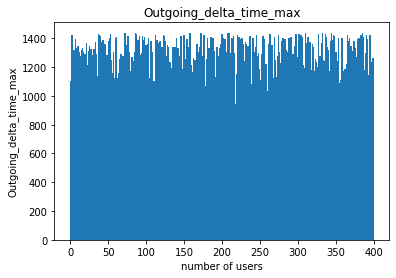

In [ ]:
plt.bar(Outgoing_delta_time['From'],Outgoing_delta_time['Outgoing_delta_time_max'] ,width=2)
plt.title("Outgoing_delta_time_max")
plt.xlabel('number of users')
plt.ylabel('Outgoing_delta_time_max')
print("Skewness: %f" % Outgoing_delta_time["Outgoing_delta_time_max"].skew())
print("Kurtosis: %f" % Outgoing_delta_time["Outgoing_delta_time_max"].kurt())
Outgoing_delta_time["Outgoing_delta_time_max"].describe()


**Call Frequency**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


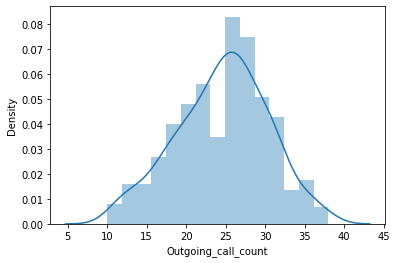

In [ ]:
Outgoing_call_counts = data.groupby('From')['Datetime'].count().reset_index()
Outgoing_call_counts = Outgoing_call_counts.rename(columns={'Datetime': 'Outgoing_call_count'})

sns.distplot(Outgoing_call_counts['Outgoing_call_count'])

Skewness: -0.208690
Kurtosis: -0.312692


count    400.000000
mean      24.585000
std        5.827321
min       10.000000
25%       21.000000
50%       25.000000
75%       28.000000
max       38.000000
Name: Outgoing_call_count, dtype: float64

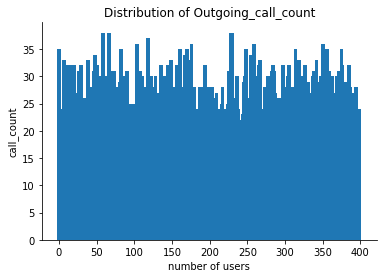

In [ ]:
plt.title("Distribution of Outgoing_call_count")
plt.xlabel('number of users')
plt.ylabel('call_count')
sns.despine()
plt.bar(Outgoing_call_counts['From'],Outgoing_call_counts['Outgoing_call_count'] ,width=5)
print("Skewness: %f" % Outgoing_call_counts["Outgoing_call_count"].skew())
print("Kurtosis: %f" % Outgoing_call_counts["Outgoing_call_count"].kurt())
Outgoing_call_counts["Outgoing_call_count"].describe()

## User Activity (To)

**Duration**

Text(0, 0.5, 'Duration')

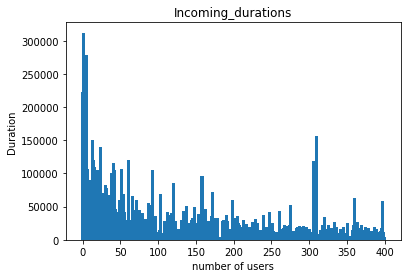

In [ ]:
Incoming_durations = data.groupby('To').agg({'Duration(seconds)': ['sum']}).reset_index()
Incoming_durations.columns = Incoming_durations.columns.droplevel()
Incoming_durations.columns = ['To', 'Incoming_durations']


plt.bar(Incoming_durations['To'],Incoming_durations['Incoming_durations'] ,width=4)
plt.title("Incoming_durations")
plt.xlabel('number of users')
plt.ylabel('Duration')

Skewness: 3.892387
Kurtosis: 22.099106


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count       398.000000
mean      26320.798995
std       34433.279406
min         798.000000
25%        7510.500000
50%       16160.000000
75%       28578.750000
max      312119.000000
Name: Incoming_durations, dtype: float64

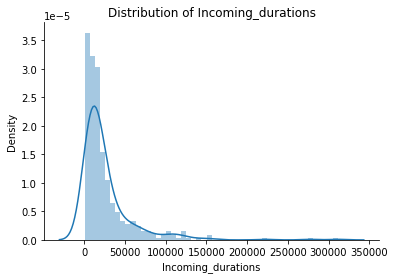

In [ ]:
sns.distplot(Incoming_durations['Incoming_durations'])
plt.title("Distribution of Incoming_durations")
sns.despine()
print("Skewness: %f" % Incoming_durations["Incoming_durations"].skew())
print("Kurtosis: %f" % Incoming_durations["Incoming_durations"].kurt())
Incoming_durations["Incoming_durations"].describe()

**Delta Time**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Incoming_delta_time_mean')

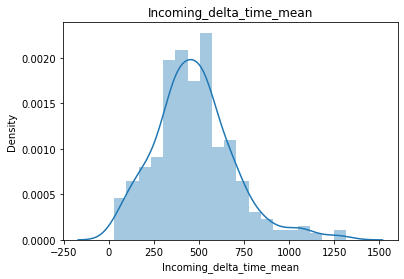

In [ ]:
data.sort_values(['To', 'Datetime'], inplace=True)
data['shift_time'] = data.groupby(['To'])['Datetime'].shift(1)
data['time_diff'] = (data['Datetime'] - data['shift_time']).dt.seconds // 60

Incoming_delta_time = data.groupby('To').agg({'time_diff': ['mean', 'max']}).reset_index()
Incoming_delta_time.columns = Incoming_delta_time.columns.droplevel()
Incoming_delta_time.columns = ['To', 'Incoming_delta_time_mean', 'Incoming_delta_time_max']


sns.distplot(Incoming_delta_time['Incoming_delta_time_mean'])
plt.title("Incoming_delta_time_mean")

Skewness: 0.716299
Kurtosis: 1.244012


count     389.000000
mean      472.753002
std       220.038880
min        29.687500
25%       337.200000
50%       455.076923
75%       586.400000
max      1317.500000
Name: Incoming_delta_time_mean, dtype: float64

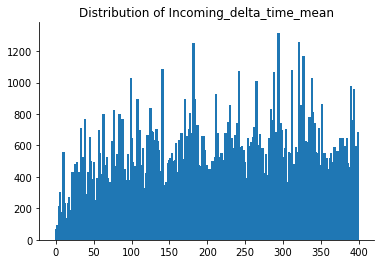

In [ ]:
plt.title("Distribution of Incoming_delta_time_mean")
sns.despine()
plt.bar(Incoming_delta_time['To'],Incoming_delta_time['Incoming_delta_time_mean'] ,width=3)
print("Skewness: %f" % Incoming_delta_time["Incoming_delta_time_mean"].skew())
print("Kurtosis: %f" % Incoming_delta_time["Incoming_delta_time_mean"].kurt())
Incoming_delta_time["Incoming_delta_time_mean"].describe()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


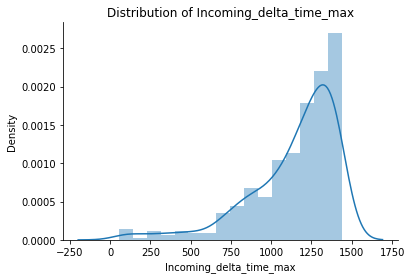

In [ ]:
sns.distplot(Incoming_delta_time['Incoming_delta_time_max'])
plt.title("Distribution of Incoming_delta_time_max")
sns.despine()

Skewness: -1.559985
Kurtosis: 2.572354


count     389.000000
mean     1141.652956
std       276.653828
min        54.000000
25%      1020.000000
50%      1223.000000
75%      1347.000000
max      1439.000000
Name: Incoming_delta_time_max, dtype: float64

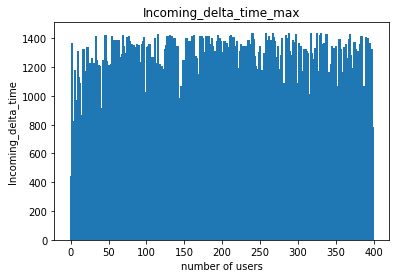

In [ ]:
plt.bar(Incoming_delta_time['To'],Incoming_delta_time['Incoming_delta_time_max'] ,width=3)
plt.title("Incoming_delta_time_max")
plt.xlabel('number of users')
plt.ylabel('Incoming_delta_time')
print("Skewness: %f" % Incoming_delta_time["Incoming_delta_time_max"].skew())
print("Kurtosis: %f" % Incoming_delta_time["Incoming_delta_time_max"].kurt())
Incoming_delta_time["Incoming_delta_time_max"].describe()

**Call Frequency**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


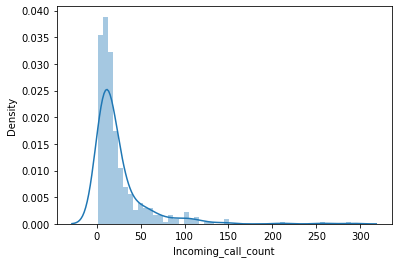

In [ ]:

Incoming_call_counts = data.groupby('To')['Datetime'].count().reset_index()
Incoming_call_counts = Incoming_call_counts.rename(columns={'Datetime': 'Incoming_call_count'})

sns.distplot(Incoming_call_counts['Incoming_call_count'])

Skewness: 3.842885
Kurtosis: 21.454682


count    398.000000
mean      24.708543
std       32.228646
min        1.000000
25%        7.000000
50%       15.000000
75%       26.000000
max      289.000000
Name: Incoming_call_count, dtype: float64

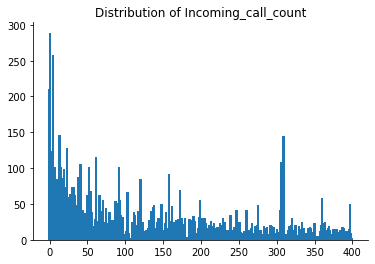

In [ ]:
plt.title("Distribution of Incoming_call_count")
sns.despine()
plt.bar(Incoming_call_counts['To'],Incoming_call_counts['Incoming_call_count']  , width=3)
print("Skewness: %f" % Incoming_call_counts["Incoming_call_count"].skew())
print("Kurtosis: %f" % Incoming_call_counts["Incoming_call_count"].kurt())
Incoming_call_counts["Incoming_call_count"].describe()

# **Profiling**

Merging all the built features

In [ ]:
merge_1 = Outgoing_call_counts.merge(Outgoing_delta_time, on='From', how='left')
merge_2 = merge_1.merge(Outgoing_durations, on='From', how='left')
merge_2.rename(columns={'From': 'user'}, inplace=True)
merge_3 = Incoming_call_counts.merge(Incoming_delta_time, on='To', how='left')
merge_4 = merge_3.merge(Incoming_durations, on='To', how='left')
merge_4.rename(columns={'To': 'user'}, inplace=True)

final_data=merge_2.merge(merge_4,on='user', how='left')
final_data



,user,Outgoing_call_count,Outgoing_delta_time_mean,Outgoing_delta_time_max,Outgoing_durations,Incoming_call_count,Incoming_delta_time_mean,Incoming_delta_time_max,Incoming_durations
0,0,35,365.235294,1051.0,42168,211.0,66.061905,445.0,222476.0
1,1,24,368.000000,1103.0,24248,289.0,33.916667,404.0,312119.0
2,2,14,479.153846,1420.0,14634,124.0,91.772358,1366.0,131382.0
3,3,16,458.200000,1305.0,18833,113.0,82.696429,704.0,121107.0
4,4,19,409.888889,1080.0,19391,68.0,212.746269,823.0,71745.0
...,...,...,...,...,...,...,...,...,...
395,395,27,410.192308,1423.0,26801,12.0,555.727273,1371.0,13422.0
396,396,16,511.466667,1233.0,16806,15.0,594.285714,1325.0,18213.0
397,397,12,316.363636,994.0,12971,50.0,77.122449,374.0,58565.0
398,398,24,329.739130,1214.0,24308,10.0,504.555556,1324.0,12213.0


## Feature Space

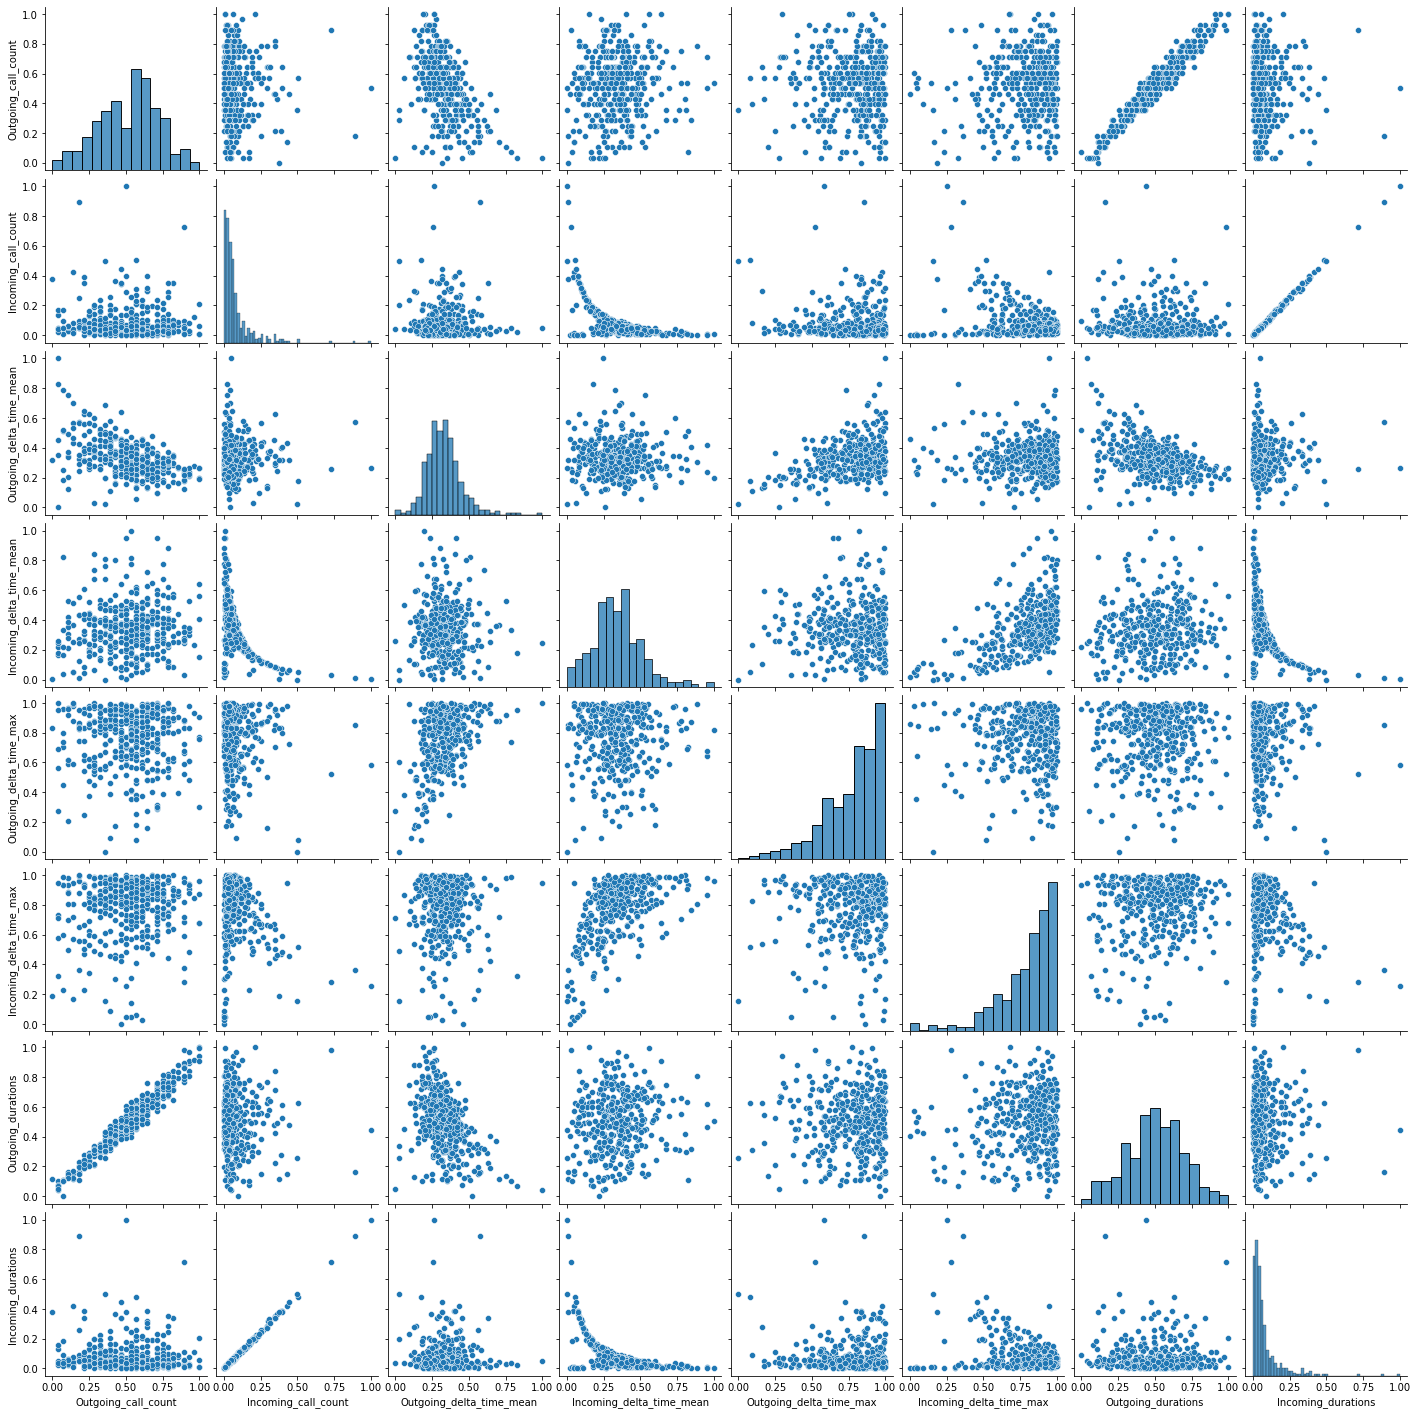

In [ ]:
feature_cols = [ 'Outgoing_call_count',
                'Incoming_call_count',
                'Outgoing_delta_time_mean',
                'Incoming_delta_time_mean',
                'Outgoing_delta_time_max',
                'Incoming_delta_time_max',
                'Outgoing_durations',
                'Incoming_durations']

data_new = final_data[feature_cols]
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(data_new)
data_new = pd.DataFrame(np_scaled, columns=feature_cols)

# sns.pairplot(final_data[feature_cols])# non- normal
sns.pairplot(data_new)#normalized


# **Clustering**

**Handling missing value**

In [ ]:
data_new[data_new.isnull().any(axis=1)]
data_new.iat[64,1]=0
data_new.iat[64,7]=0
data_new.iat[107,1]=0
data_new.iat[107,7]=0
data_new.fillna(data_new.mean(),inplace=True)
data_new[data_new.isnull().any(axis=1)]

,Outgoing_call_count,Incoming_call_count,Outgoing_delta_time_mean,Incoming_delta_time_mean,Outgoing_delta_time_max,Incoming_delta_time_max,Outgoing_durations,Incoming_durations


N-Clusters Evaluation

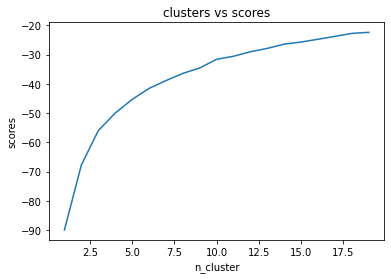

In [ ]:

RANDOM_STATE = 123
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i, random_state=RANDOM_STATE).fit(data_new) for i in n_cluster]
scores = [kmeans[i].score(data_new) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores )

plt.title("clusters vs scores")
plt.xlabel('n_cluster')
plt.ylabel('scores')

plt.show()

Dimentionality reduction with T-SNE

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.001s...
[t-SNE] Computed neighbors for 400 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 0.159812
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.178658
[t-SNE] KL divergence after 300 iterations: 0.866616


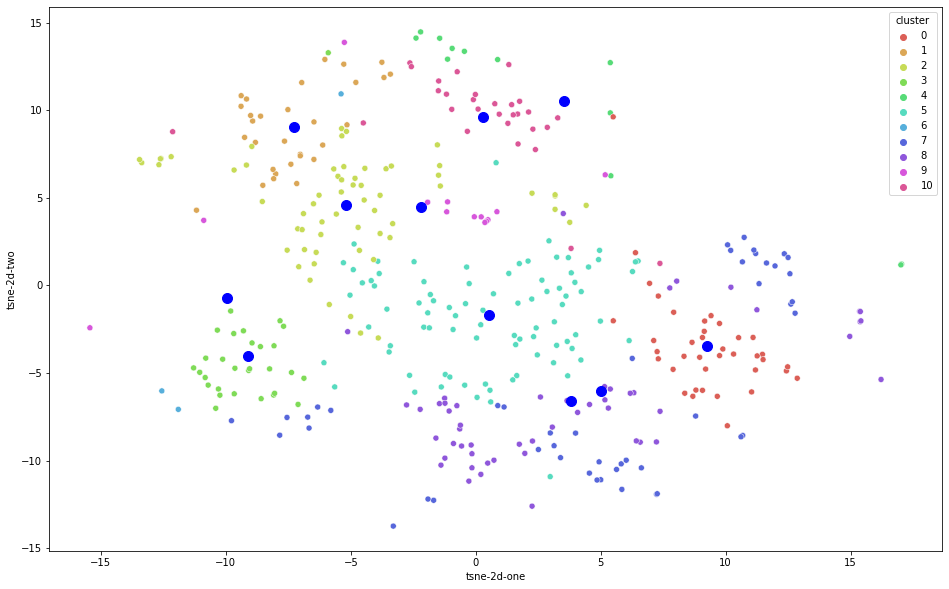

In [ ]:
cluster_model = kmeans[10]

final_data['cluster'] = cluster_model.predict(data_new)
final_data['cluster'].value_counts()

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, random_state=RANDOM_STATE)

tsne_results = tsne.fit_transform(data_new)

final_data['tsne-2d-one'] = tsne_results[:, 0]
final_data['tsne-2d-two'] = tsne_results[:, 1]

tsne_cluster = final_data.groupby('cluster').agg({'tsne-2d-one': 'mean', 'tsne-2d-two': 'mean'}).reset_index()

plt.figure(figsize=(16, 10))

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="cluster",
    palette=sns.color_palette("hls", 11),
    data=final_data,
    legend="full",
    alpha=1
)

plt.scatter(x="tsne-2d-one", y="tsne-2d-two", data=tsne_cluster, s=100, c='b')

plt.show()


# Classification by Distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys


(array([ 4., 10., 16., 26., 19., 24., 17., 25., 22., 24., 29., 25., 14.,
        10.,  8.,  8.,  8., 11., 16.,  3.,  5.,  6.,  3.,  6.,  7.,  3.,
         3.,  5.,  4.,  3.,  2.,  5.,  3.,  0.,  1.,  4.,  1.,  4.,  1.,
         2.,  0.,  1.,  1.,  2.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 3.60598445,  3.78748545,  3.96898645,  4.15048746,  4.33198846,
         4.51348946,  4.69499046,  4.87649146,  5.05799247,  5.23949347,
         5.42099447,  5.60249547,  5.78399647,  5.96549747,  6.14699848,
         6.32849948,  6.51000048,  6.69150148,  6.87300248,  7.05450349,
         7.23600449,  7.41750549,  7.59900649,  7.78050749,  7.9620085 ,
         8.1435095 ,  8.3250105 ,  8.5065115 ,  8.6880125 ,  8.869513

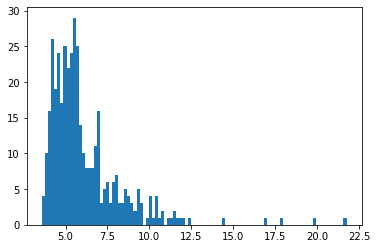

In [ ]:
centers = cluster_model.cluster_centers_
points = np.asarray(data_new)
total_distance = pd.Series()
def get_sum_square_distance(data, cluster_model):
    centers = cluster_model.cluster_centers_
    points = np.asarray(data[feature_cols])
    total_distance = pd.Series()
    for i in range(len(points)):
        distance = 0
        for j in range(len(centers)):
            a = np.linalg.norm(points[i] - centers[j])
            distance += a ** 2
        total_distance.at[i ]=distance

    return total_distance
final_data['ssd'] = get_sum_square_distance(data_new, cluster_model)
plt.hist(final_data['ssd'], bins=100)


cutting off outliers

,user,Outgoing_call_count,Outgoing_delta_time_mean,Outgoing_delta_time_max,Outgoing_durations,Incoming_call_count,Incoming_delta_time_mean,Incoming_delta_time_max,Incoming_durations,cluster,tsne-2d-one,tsne-2d-two,ssd,anomaly_kmeans
0,0,35,365.235294,1051.0,42168,211.0,66.061905,445.0,222476.0,6,-11.900934,-7.073650,17.788943,1
1,1,24,368.000000,1103.0,24248,289.0,33.916667,404.0,312119.0,6,-12.560672,-6.019660,21.756085,1
5,5,15,571.285714,1320.0,14947,258.0,38.984436,553.0,277893.0,6,-5.388720,10.937115,19.760392,1
13,13,26,311.000000,693.0,30352,146.0,98.089655,767.0,150833.0,4,17.036575,1.220194,11.657890,1
33,33,13,687.583333,1374.0,14091,8.0,713.428571,1414.0,9263.0,1,-9.390970,10.227941,10.623784,1
58,58,38,327.027027,872.0,40655,19.0,549.722222,1389.0,19092.0,0,12.429635,-4.877986,12.125093,1
105,105,13,331.583333,794.0,14149,9.0,422.750000,1278.0,10957.0,10,1.323511,12.609115,10.024917,1
141,141,12,528.909091,1198.0,13325,4.0,1088.333333,1348.0,4927.0,10,-12.127513,8.777361,11.416970,1
182,182,24,467.826087,1151.0,25003,3.0,1253.500000,1417.0,3493.0,8,14.965076,-2.908060,10.000139,1
201,201,25,352.208333,918.0,26053,3.0,71.000000,115.0,3840.0,9,5.179897,6.316189,10.383978,1


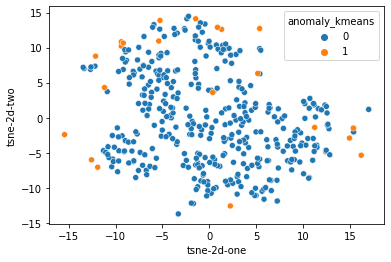

In [ ]:
cutoff = 10
final_data['anomaly_kmeans'] = (final_data['ssd'] >= cutoff).astype(int)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_kmeans",
    data=final_data,
    legend="full",
    alpha=1
)
final_data.loc[final_data['anomaly_kmeans'] == 1]